## 1091 Shortest Path in Binary Matrix
Given an n x n binary matrix grid, return the length of the shortest clear path in the matrix. If there is no clear path, return -1.
https://leetcode.com/problems/shortest-path-in-binary-matrix/

In [86]:
import matplotlib.pyplot as plt

In [87]:
# build the transition function

def transition(grid, cur_state, direction):
    """
    return the next state after taking direction from cur_state
    if run into wall, return the cur_state itself
    type grid: List[List[int]]
    type cur_state: 1x2 tuple
    type direction: int
    rtype: 1x2 tuple
    """
    a,b = cur_state
    if direction==0:
        next_state = (a-1,b)
    elif direction==1:
        next_state = (a-1,b+1)
    elif direction==2:
        next_state = (a,b+1)
    elif direction==3:
        next_state = (a+1,b+1)
    elif direction==4:
        next_state = (a+1,b)
    elif direction==5:
        next_state = (a+1,b-1)
    elif direction==6:
        next_state = (a,b-1)
    elif direction==7:
        next_state = (a-1,b-1)
    else:
        next_state = cur_state
    # if next_state exceedes the grid, return cur_state
    c,d = next_state
    if (c<0 or c>len(grid)-1 or d<0 or d>len(grid)-1):
        next_state = cur_state
    elif grid[c][d] == 1: # if next_state is a wall (value 1), return cur_state
        next_state = cur_state
    
    return next_state

# test case:
grid = [[0,1],[0,0]]
cur_state = (0,0)
direction = 4
transition(grid, cur_state, direction)

(1, 0)

In [88]:
# build the bfs algorithm
def bfs(grid):
    grid_len = len(grid)
    start = (0,0)
    end = (grid_len-1,grid_len-1)
    
    visited = []
    to_expand = []
    final_path = []
    all_directions = [0,1,2,3,4,5,6,7]
    
    to_expand.append((start,[]))
    
    while (len(to_expand)>0) and (len(final_path)==0):
        cur_state,cur_path = to_expand.pop(0)
        if cur_state == end:
            final_path = cur_path
        elif cur_state not in visited:
            visited.append(cur_state)
            for direction in all_directions:
                neighbor = transition(grid, cur_state, direction)
                if neighbor not in visited:
                    nb_path = cur_path.copy()
                    nb_path.append(direction)
                    to_expand.append((neighbor,nb_path))
    
    return final_path

In [89]:
# function for producing the solution path
from copy import deepcopy # since grid is a list containing lists, we have to use copy.deepcopy
def plot_solution(grid,final_path):
    # replay the solution and create the solution grid
    solution_grid = deepcopy(grid) # deep copy the grid
    next_state = (0,0)
    solution_grid[0][0] = 0.5 # paint the start as grey
    for action in final_path:
        next_state = transition(grid,next_state,action)
        solution_grid[next_state[0]][next_state[1]] = 0.5 # solution color
    fig = plt.figure(figsize=(15, 15))
    ax = fig.add_subplot(111)
    ax.imshow(solution_grid,cmap='binary')

In [91]:
# test the bfs 1
grid = [[0,1],[1,0]]
bfs(grid)

[3]

In [92]:
# test the bfs 2
grid = [[0,0,0],[1,1,0],[1,1,0]]
bfs(grid)

[2, 3, 4]

[2, 3, 4]


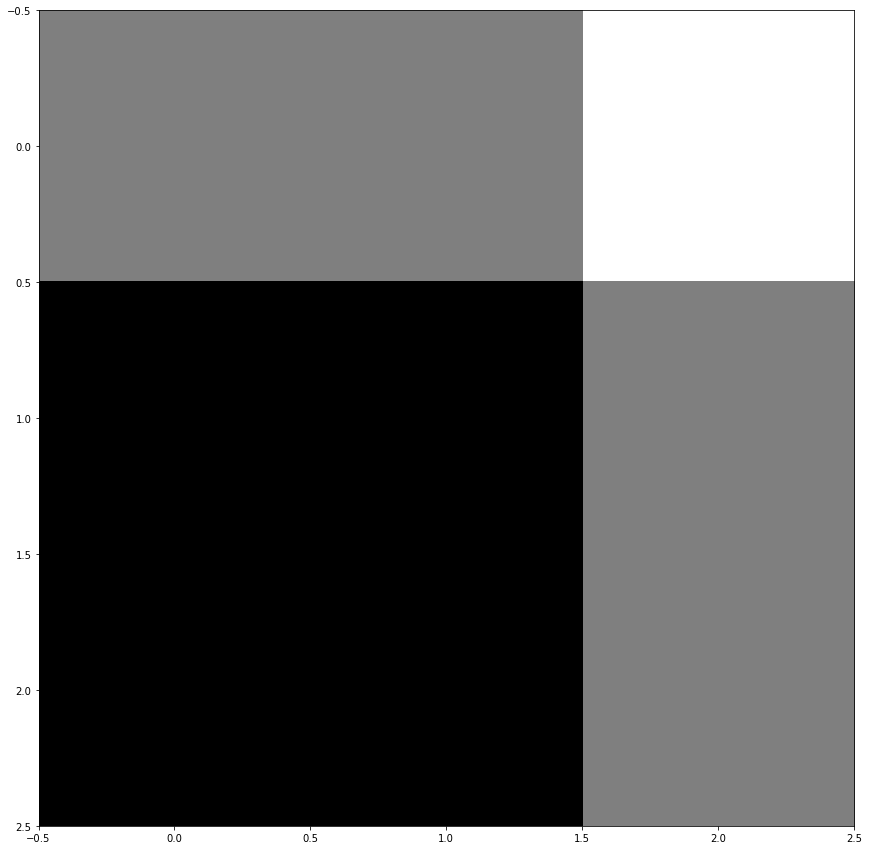

In [93]:
# test the bfs 3 (no path)
grid = [[1,0,0],[1,1,0],[1,1,0]]
final_path = bfs(grid)
plot_solution(grid,final_path)
print(final_path)

[]


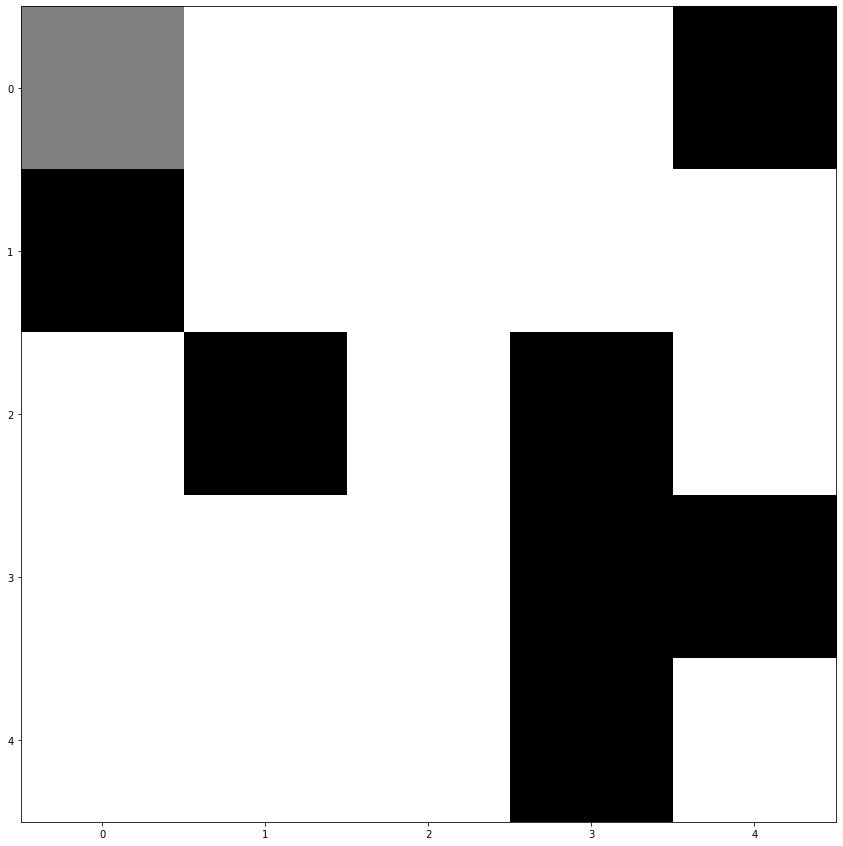

In [94]:
# test the bfs 4 (no path)
grid = [[0,0,0,0,1],[1,0,0,0,0],[0,1,0,1,0],[0,0,0,1,1],[0,0,0,1,0]]
bfs(grid)

final_path = bfs(grid)
plot_solution(grid,final_path)
print(final_path)

[3, 3, 3, 2, 3, 3, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 2, 3, 1, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 4]


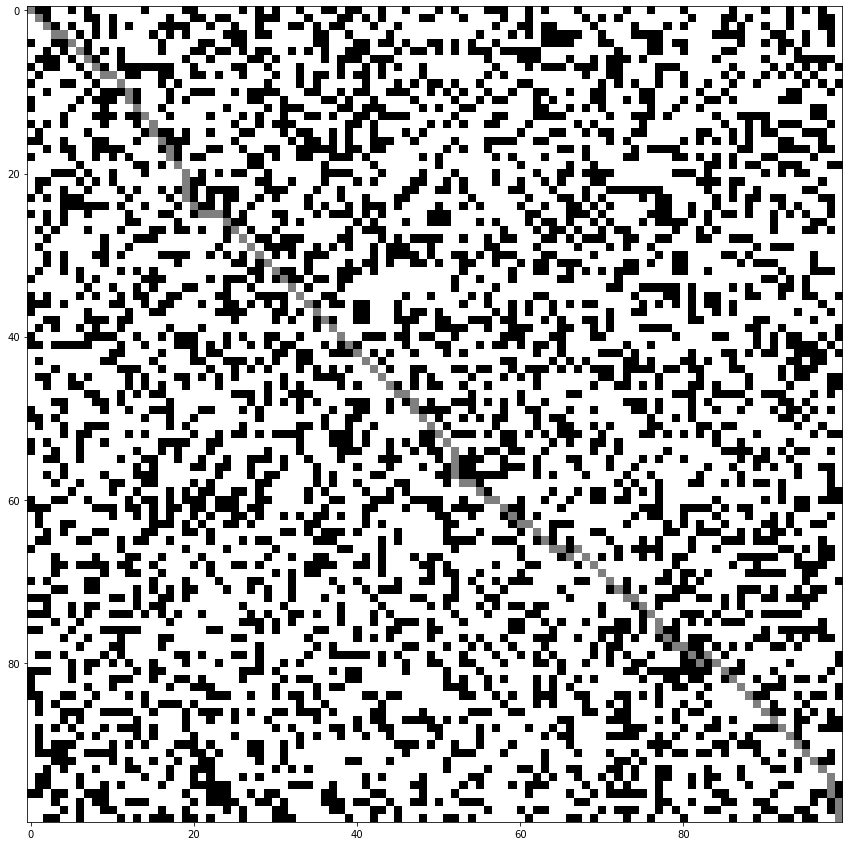

In [95]:
# test the bfs 5
grid = [[0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0],[0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,1,1,1,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,1,0],[0,0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,1,1,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,0,1,1,0],[0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,1,1,1,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,1,0,0,1,0],[1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,0,1,1,0,1,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,1,0,0,1,0,1,0,1,0,0,1,1,1,0,0,0,1,0,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0],[0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,1,0],[1,0,1,1,0,0,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,1,0,1,1,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1],[0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,0,0],[1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1],[0,0,1,0,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0],[1,0,0,0,0,0,1,0,1,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0],[1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,1,0,0,0,0,1,1,0,1,1,1,0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0],[0,0,0,0,1,0,0,0,1,1,1,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,0,1,0,0,1,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0],[1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,1,0,0,0,1,0],[0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,1,1,1,0,0],[1,1,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,1,1,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0],[0,0,1,0,1,1,0,0,1,1,1,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1,1,1,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,1,0,1,1,0],[1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0],[0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,0,0,0,1,1],[0,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0],[0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0],[0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0],[1,0,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,1,0,1,1,0,0,0,0,1,1,0],[0,0,0,0,1,1,1,1,1,1,0,1,0,0,1,0,0,0,1,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0],[1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,1,1,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,1,0,1,0,0,1,0],[0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,1,1,0,0,0,1,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,0,0,0,1,0,1,1,1,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0],[0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0],[0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,1,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,1,1,0,0,1,0,0,1,0,1,1,0,0,0,1,1,0,1,0,1,1,1,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0],[0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,0,0],[0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,1,0,0,1,1,0,1,0,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,0],[0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,1,1,0,1,1,1,0,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,0],[0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0],[1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,0,1,0,1,0,1,1,0,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,0,0,0],[0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,1,1,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,0,0,0],[1,0,1,0,0,0,1,0,1,0,0,1,0,1,1,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,0,1,1,0,0,1,0,0,1,1,0,0,1],[1,1,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0],[1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,1,1,0,0,0,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0],[0,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,1,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1],[1,0,0,0,0,0,0,1,1,1,1,0,0,1,0,0,1,0,1,1,1,0,0,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1],[1,1,0,1,1,1,1,1,0,0,0,1,0,0,1,0,0,0,1,1,1,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,1,1,0,1,0,1,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,1,1,1,0,1,0],[0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,1,0,1,1,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,1,1,0,0,1,1,1,1,0,1],[0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0,0,1,1,0,1,1,0,0],[0,0,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,0,1,1,1,0,1,1,1,1,0,1,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,1,1,1,0,0,0],[0,1,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1],[0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1],[0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,1,1,0,0,0,1,0,1,0],[0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0],[1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,1,1,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,1,0,1,0,1,0],[1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0],[0,1,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0],[0,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1,0,1,1,1,1,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,1,1,1,0,1,0,1,1,0,1,0,1,0,1,1,1,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,1],[1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0],[1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,0,1,1,0,1,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,1,1,0,1,0,1,0,1,1,0,0,1,0],[0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,1,1,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0],[0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,1,0,0,0,1,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0],[0,0,0,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0,1,0],[0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,1,0,0,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1],[1,0,0,1,1,0,0,1,0,0,0,0,1,0,1,1,0,1,0,1,1,1,0,1,1,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,1,0,1,1,1],[1,1,1,0,0,0,0,0,1,1,1,0,1,1,0,1,0,1,1,0,1,1,0,1,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,1,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0],[0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,1,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0],[0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0],[0,0,1,0,1,0,0,0,1,1,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,1,0,0,1,0,1,0,1,1,0,1,0,0,0,0,0],[0,1,1,0,0,0,1,1,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,1,0,0],[1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,1,0,1,1,0],[0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,1,1,1,1,0,0,1,0,0,1,1,0],[0,0,0,1,1,0,1,1,1,1,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,1,1,0,0],[0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,1,1,1,1,0,0,1,1,0,0,0],[1,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1],[0,0,0,1,1,0,0,1,1,0,0,0,0,1,0,1,0,1,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,0,0,0,0,1,1,1,0,1,0,0,1,0,1,1,0,0],[1,1,1,0,0,0,0,0,0,0,1,1,0,1,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,1,1,1,0,0,0],[0,0,1,0,0,1,0,1,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0],[1,1,1,0,0,1,0,1,0,0,1,1,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,0,1,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,0,1,1,1,1,1,0,0,0,0,0],[0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0,1,0,0,0,1,0,1,0,1,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0],[1,1,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,1,1,1,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1,1,1,0,0],[0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,1,1,0,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,1,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,1,0],[0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,1,1,0,1,0,1,0,1,0,0,1,1,0,1,0,0,0,0,0],[0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,1,1,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1],[0,0,0,0,0,1,0,1,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,0,1,0,0,0,1,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1],[1,1,1,0,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,0,0,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,1,1,1,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0],[1,0,0,0,0,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,0,1,1,0,1,0,0],[1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1],[1,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,1,0,0,1,1,0,0,0,1,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,1,0,1],[0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0],[0,1,0,0,1,1,1,0,0,1,1,1,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,1,0,0,1,1,0,1,1,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,1,1,0,1,0,1,0,1,0],[0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,1,0,0,1,1],[0,1,0,1,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,1,1,0,0,1,0,0,1,1,1],[0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0],[0,1,0,1,1,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,1,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,1,1,0,1,1,1,0,0,0,0,0,1,0,0,0,0],[0,1,1,1,1,0,0,1,1,1,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,1,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0],[0,0,0,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,0],[0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,1,1,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,1,1,0,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0],[0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0],[0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,0,0,0,0,0,0,0,1,1,1,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1],[1,1,0,1,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,1,0,1,1,0,0,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1],[0,0,0,1,0,0,1,0,1,1,0,0,1,1,1,0,0,0,0,0,1,0,1,1,1,1,0,0,1,1,0,1,0,0,0,0,1,1,1,0,1,1,0,0,1,0,0,1,1,0,1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,0,1,0,1,0],[0,0,0,0,1,0,1,0,0,1,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,1,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,1,0,0,1,1,0,0,1,0],[0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,1,1,1,0,1,1,0,1,0,0,0,1,0,0,0,1,1,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,0,1,1,0,0,0]]
final_path = bfs(grid)
plot_solution(grid,final_path)
print(final_path)

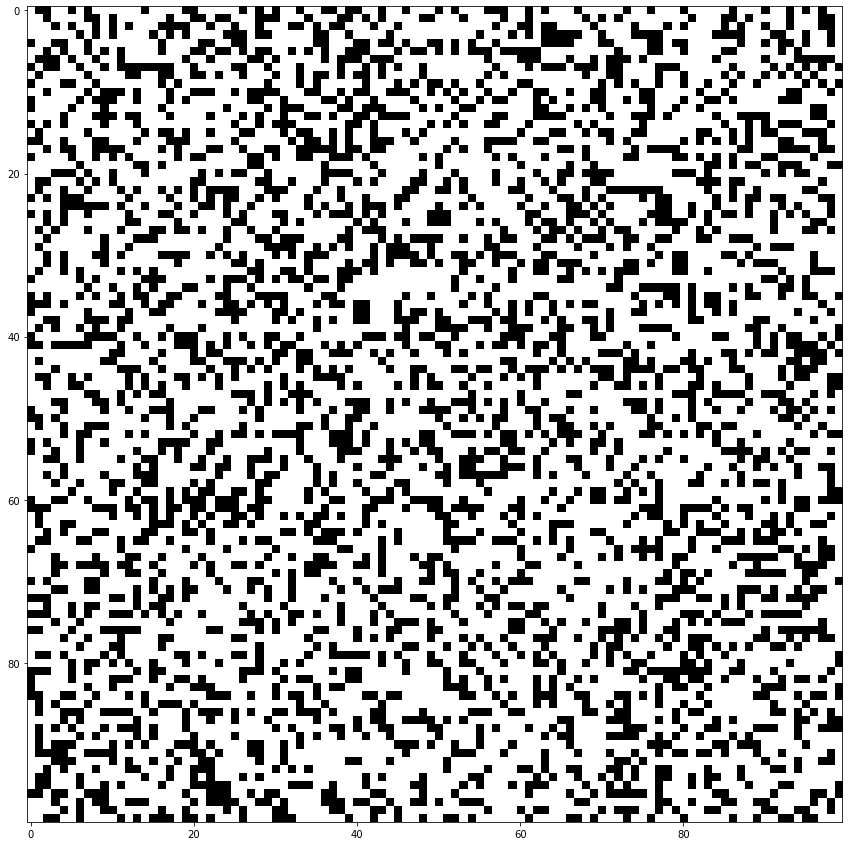

In [96]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
ax.imshow(grid,cmap='binary')

In [ ]:
# The above BFS approach, however, timed out for the leetcode task. Below is the solution implementation.